# **Exercise 4, Advanced Deep Learning**
Eetu Karttunen

Implement Batch Normalization with your own CNN model in Exercise 1 on MNIST dataset, compare the differences between with Batch Normalization and without Batch Normalization, display the classification error (%) by epoch.

**Answer:**
As seen in the visualization generated by this code, batch normalization brings the results closer together. For instance, the sigmoid, which initially stands apart from the others, is now in close proximity. While some of the results show a slight decline with batch normalization, the overall accuracy remains relatively consistent. Notably, the loss exhibits a slight increase.

In summary, batch normalization generally improves overall results. In this specific case, however, the values don't degrade significantly with batch normalization, making the difference less substantial. Consequently, it becomes crucial to discern when to apply batch normalization, as there are instances where it may not be advisable if it significantly worsens the results.


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6691 - accuracy: 0.7782 - val_loss: 0.1231 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9696 - val_loss: 0.0778 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0688 - accuracy: 0.9796 - val_loss: 0.0628 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0539 - accuracy: 0.9831 - val_loss: 0.0543 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0404 - val_accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0372 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0401 - val_accurac

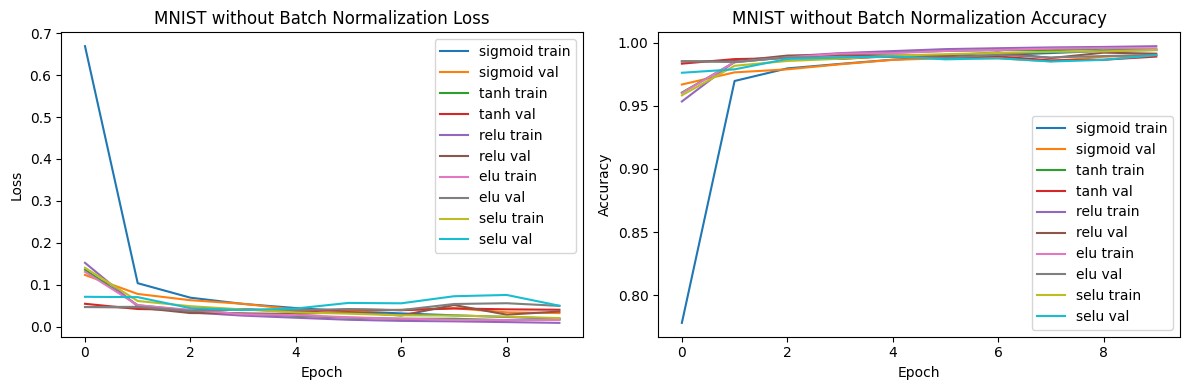

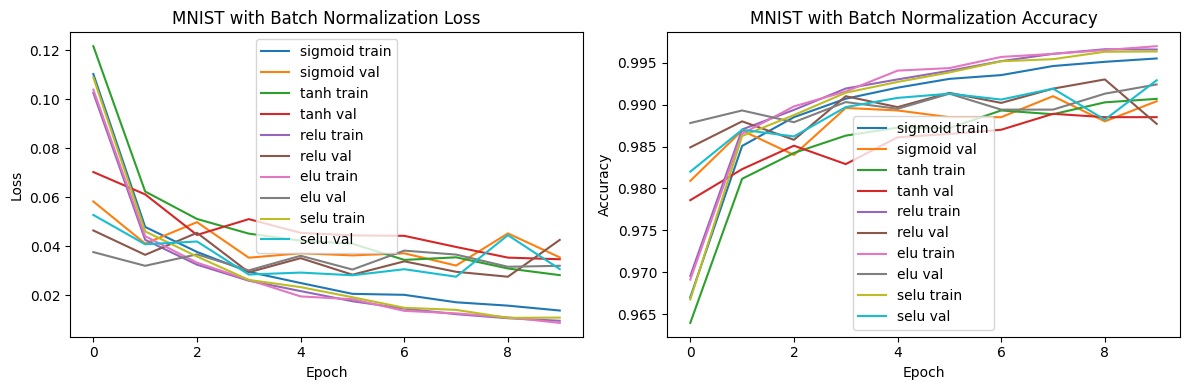

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.activations import sigmoid, tanh, relu, elu, selu
import numpy as np
import matplotlib.pyplot as plt

# Loading MNIST
mnist = keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# Normalizing pixel values between 0 and 1
trainImages, testImages = trainImages / 255.0, testImages / 255.0

# Defining activation functions like in the exercise 1
activationFunctions = [sigmoid, tanh, relu, elu, selu]

# Craating place for storing the results without normalization
mnistResults = {}

# Modifying code to include Batch Normalization
inputShapeMnist = (28, 28, 1)

for activationFunction in activationFunctions:
    mnistHistory = buildAndTrainCnn(activationFunction, (trainImages, trainLabels, testImages, testLabels), inputShapeMnist, use_batch_norm=False)
    mnistResults[activationFunction.__name__] = mnistHistory

# Creating place for storing results with Batch Normalization
mnistResultsWithBatchNorm = {}

for activationFunction in activationFunctions:
    mnistHistory = buildAndTrainCnn(activationFunction, (trainImages, trainLabels, testImages, testLabels), inputShapeMnist, use_batch_norm=True)
    mnistResultsWithBatchNorm[activationFunction.__name__] = mnistHistory

# Function defying to get the results.
def plotResults(results, datasetName):
    plt.figure(figsize=(12, 4))

    for activationFunction, history in results.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{activationFunction} train')
        plt.plot(history.history['val_loss'], label=f'{activationFunction} val')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{activationFunction} train')
        plt.plot(history.history['val_accuracy'], label=f'{activationFunction} val')

    plt.subplot(1, 2, 1)
    plt.title(f'{datasetName} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'{datasetName} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualizing the results
plotResults(mnistResults, 'MNIST without Batch Normalization')
plotResults(mnistResultsWithBatchNorm, 'MNIST with Batch Normalization')
